In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("drive/My Drive/CHE1147/A3") 

# **1 Feature engineering**
1.1 Import the data and create the anchor date columns
In order to create features, you need to create some anchor dates. The most typical for
transaction data is the end of the month and the year.

1. Import the dataset as txn and identify the number of rows.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
txn = pd.read_csv('Retail_Data_Transactions.csv')
print(txn.shape[0])

125000


txn have 125000 rows

2. The date-format in column ’trans date’ is not standard. Create a new column ’txn date’
from ’trans date’ with pd.to datetime and drop the column ’trans date’.

In [5]:
txn.head(10)

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
5,CS5539,26-Mar-14,81
6,CS2724,06-Feb-12,93
7,CS5902,30-Jan-15,89
8,CS6040,08-Jan-13,76
9,CS3802,20-Aug-13,75


In [6]:
txn['txn_date'] = pd.to_datetime(txn['trans_date']) 
txn = txn.drop(['trans_date'],axis=1)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


In [7]:
txn.head(10)

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
5,CS5539,81,2014-03-26
6,CS2724,93,2012-02-06
7,CS5902,89,2015-01-30
8,CS6040,76,2013-01-08
9,CS3802,75,2013-08-20


3. Identify the min() and max() of column ’txn date’.

In [8]:
print(min(txn['txn_date']))

2011-05-16 00:00:00


In [9]:
print(max(txn['txn_date']))

2015-03-16 00:00:00


4. Create the column ’ME DT’: the last day of the month in the ’trans date’ column.
DateOffset objects is a simple way to do this in pandas.

In [10]:
txn['ME_DT'] = txn['txn_date'] + pd.offsets.MonthEnd(n=0)

In [11]:
txn.head(10)

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
5,CS5539,81,2014-03-26,2014-03-31
6,CS2724,93,2012-02-06,2012-02-29
7,CS5902,89,2015-01-30,2015-01-31
8,CS6040,76,2013-01-08,2013-01-31
9,CS3802,75,2013-08-20,2013-08-31


5. Create the column ’YEAR’: the year in the ’trans date’ column. DatetimeIndex with
attribute .year will help you do so.

In [12]:
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year

In [13]:
txn.head(10)

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
5,CS5539,81,2014-03-26,2014-03-31,2014
6,CS2724,93,2012-02-06,2012-02-29,2012
7,CS5902,89,2015-01-30,2015-01-31,2015
8,CS6040,76,2013-01-08,2013-01-31,2013
9,CS3802,75,2013-08-20,2013-08-31,2013


1.2 Create features that capture annual spending
Here the approach is to capture the client’s annual spending. The rationale behind this
approach is that the clients spend is not very frequent to capture in a monthly aggregation.

1. Using groupby and NamedAgg create clnt annual aggregations, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation
functions. A snapshot of the output table is shown below. Notice that the output is a
typical MultiIndex pandas dataframe.

In [14]:
clnt_annual_aggregations = txn.groupby(["customer_id",'YEAR']).agg(ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'),
                                                                   ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),
                                                                   ann_txn_amt_var = pd.NamedAgg('tran_amount','var'),
                                                                   ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),
                                                                   ann_txn_amt_max = pd.NamedAgg('tran_amount','max'),
                                                                   ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),
                                                                   ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count')
)

In [15]:
clnt_annual_aggregations.head(10)

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
CS1113      2011              244        81.333333        21.079216   
            2012              374        74.800000        17.035258   
            2013              426        85.200000        13.084342   
            2014              226        56.500000        27.958302   
            2015              220        73.333333        27.300794   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
CS1113      2011       444.333333        12.170091               94   
            2012       290.200000         7.618399               95   
            2013       171.200000         5.851496               97   
            2014       781.666667        13.979151               97   
            2015       745.333333        15.762121               98   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1  
CS1113      2011               57                3  
            2012               51                5  
            2013               65                5  
            2014               36                4  
            2015               44                3

2. Plot the histogram of the sum and count.

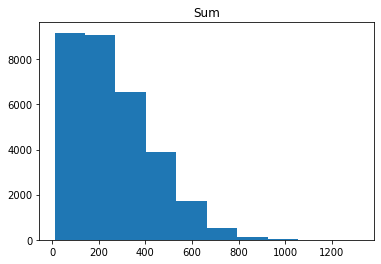

In [16]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title("Sum")
plt.show()

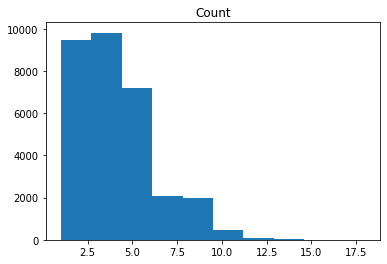

In [17]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title("Count")
plt.show()

3. Reset the index and reshape the table with the pivot table function to create the clnt annual aggregations pivot table shown below with 40 columns (why 40?).

Since we have 8 features and each have 5 years so is 40 columns



You should expect columns with NaN values. Impute the NaN entries when you
perform the pivot table function and explain your choice of values.

I choose to fill it with zero since Nan value in this case means no data, therefore I think choose zero would be better instead of to create something else.

In [18]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns='YEAR',index='customer_id').fillna(0)

In [19]:
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   
...                     ...  ...  ...  ...  ...  ...             ...    ...   
CS8996                  2.0  3.0  2.0  6.0  0.0  ...            62.0  101.0   
CS8997                  2.0  4.0  6.0  2.0  0.0  ...            90.0  158.0   
CS8998                  2.0  5.0  2.0  4.0  0.0  ...           128.0  272.0   
CS8999                  3.0  4.0  3.0  2.0  0.0  ...           156.0  101.0   
CS9000                  2.0  4.0  2.0  4.0  1.0  ...            39.0  216.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   
...            ...    ...    ...             ...         ...          ...   
CS8996        83.0  336.0    0.0       98.000000   20.333333   144.500000   
CS8997       211.0   84.0    0.0        8.000000   45.666667   441.366667   
CS8998        94.0  130.0    0.0       50.000000  505.300000  1568.000000   
CS8999        84.0   42.0    0.0      333.000000   21.583333   103.000000   
CS9000       147.0   97.0   34.0       24.500000  281.333333    12.500000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  
...                 ...         ...  
CS8996       481.600000    0.000000  
CS8997        18.000000    0.000000  
CS8998       219.666667    0.000000  
CS8999        18.000000    0.000000  
CS9000        68.250000    0.000000  

[6889 rows x 40 columns]

4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You
can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’,
’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1)
with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with
the following two expressions.
What are your observations regarding the number of levels and the column names?

Only two levels of columns with name of None and YEAR

In [20]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [21]:
print(clnt_annual_aggregations_pivot.columns)

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

5. Finally, you want to save the dataframe clnt annual aggregations pivot as an
.xlsx file for future use in the machine learning assignment. To do so, you want
to remove the two levels in columns and create a single level with column names:
’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet
below prior to saving the dataframe as an Excel file.
Describe what each line of code in the box does and save the output dataframe as
an Excel file annual features.xlsx. A snapshot of the desired final output is shown
below.

In [22]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [23]:
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2.0,3.0,2.0,6.0,0.0,...,62.0,101.0,83.0,336.0,0.0,98.000000,20.333333,144.500000,481.600000,0.000000
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2.0,4.0,6.0,2.0,0.0,...,90.0,158.0,211.0,84.0,0.0,8.000000,45.666667,441.366667,18.000000,0.000000
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2.0,5.0,2.0,4.0,0.0,...,128.0,272.0,94.0,130.0,0.0,50.000000,505.300000,1568.000000,219.666667,0.000000


In [24]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

6. What are the possible disadvantages in capturing client transaction behavior with the
annual features described in this section (if any)?

1.3 Create monthly aggregations
Here, you want to explore the monthly sum of
amounts and count of clients transactions.

1. Create the dataframe that captures the monthly
sum and count of transactions per client (name
it clnt monthly aggregations). Use the
groupby function with the Named Aggregation
feature which was introduced in pandas version 0.25.0. Make sure that you name the columns
as shown in the figure sample on the right.

In [25]:
clnt_monthly_aggregations = txn.groupby(["customer_id",'ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),mth_txn_cnt = pd.NamedAgg('tran_amount','count'))
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

2. Create a histogram of both columns you created. What are your observations? What are
the most common and maximum values for each
column? How do they compare with the ones
in section 1.2?

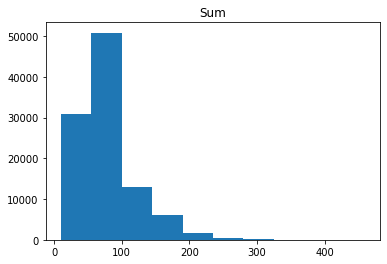

In [26]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title("Sum")
plt.show()

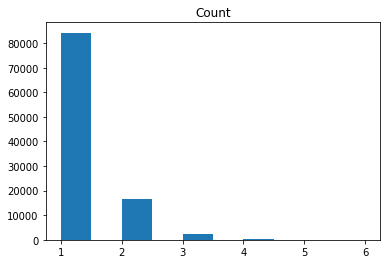

In [27]:
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title("Count")
plt.show()

In [28]:
print('Most Common Value for sum:',clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0])
print('Maximum Value for sum:',clnt_monthly_aggregations['mth_txn_amt_sum'].max())
print('Most Common Value for count:',clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
print('Maximum Value for count:',clnt_monthly_aggregations['mth_txn_cnt'].max())

Most Common Value for sum: 77
Maximum Value for sum: 460
Most Common Value for count: 1
Maximum Value for count: 6


1.4 Create the base table for the rolling window features
1. Create the numpy array of the unique elements in columns ’customer id’ and ’ME DT’
of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients
and 47 unique month-end-dates.

In [29]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()
print(len(txn['customer_id'].unique()))
print(len(txn['ME_DT'].unique()))

6889
47


2. Use itertools.product to generate all the possible combinations of ’customer id’ and
’ME DT’. Itertools is a Python module that iterates over data in a computation￾ally efficient way. You can perform the same task with a for-loop, but the execution
may be inefficient. For a brief overview of the Itertools module see here. If you
named the numpy arrays with the unique elements: clnt no and me dt, then the
code below will create an itertools.product object (you can confirm this by running:
type(base table)).

In [30]:
from itertools import product

In [31]:
base_table = product(clnt_no, me_dt)

3. Next, you want to convert the itertools.product object base table into a pandas object called base table pd. To do so, use pd.DataFrame.from records and name the
columns ’CLNT NO’ and ’ME DT’.

In [32]:
base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd.columns = ['CLNT_NO', 'ME_DT']

In [33]:
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


4. Finally, you want to validate that you created the table you originally wanted. There
are two checks you want to perform:

❼ Filter client CS1112 and confirm that the dates fall between the min and max
month-dates you identified in section 1.1. Also, confirm that the snapshot of client
CS1112 has 47 rows, one for each month in the dataset.

❼ Confirm that the base table pd has 323,783 rows, which is the expected value
of combinations for 6,889 unique clients and 47 unique month-end dates.

In [34]:
filter = base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']

In [35]:
print(min(filter['ME_DT']))
print(max(filter['ME_DT']))
print(len(filter))

2011-05-31 00:00:00
2015-03-31 00:00:00
47


min date: 2011-05-31 00:00:00, max date: 2015-03-31 00:00:00

In [36]:
print(base_table_pd.shape[0])

323783


1.5 Create the monthly rolling window features
1. Left-join the base table pd with the clnt monthly aggregations table from section 1.3 on [CLNT NO, ME DT] to create the table base clnt mth. Comment on the following questions in Markdown:

In [37]:
clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'],inplace=True)
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, on = ['CLNT_NO', 'ME_DT'], how = 'left')
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


Why do some rows have NaN values?

Since we use left join method and base_table_pd has 323783 rows but clnt_monthly_aggregations only has 103234 rows so NaN value will fill the empty place.

What values will you choose to impute NaN values in the sum and count columns?
Perform the imputation you suggest.

I think 0 should be suitable value since no value mean no transaction so if we use other value to fill will be unreasonable.

In [38]:
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


Confirm that the number of rows is what you expect. What is the value?

323783, since we use left join so the row number should be same as base_table_pd

In [39]:
len(base_clnt_mth)

323783

How are tables base clnt mth and clnt monthly aggregations different? Comment on the number of rows and the content of each table.

clnt_monthly_aggregations has 103234 rows, and base_clnt_mth has 323783 rows. For clnt_monthly_aggregations it contain only customers transaction and base_clnt_mth contain both transaction and non-transaction.

2. For the next step, the calculation of the rolling window features, you need to sort the
data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary
to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [40]:
base_clnt_mth = base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],ascending = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


3. The idea behind rolling window features is captured in the image below. You calculate
some statistical properties (e.g. average) based on a window that is sliding. In the
image below, the window is 7 which means that the last 7 points are used at every row
to calculate the statistical property

Here, you have to calculate separately the 3, 6 and 12-month rolling window features
(tables: rolling features 3M, rolling features 6M, rolling features 12M) for
every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns
’mth txn amt sum’ and ’mth txn cnt’. The steps to achieve this with base clnt mth
as the starting dataframe are:

❼ groupby the client number

❼ select the two columns you want to aggregate

❼ use the rolling function with the appropriate windows

❼ aggregate with ’sum’, mean’ and ’max’

In [41]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg(['sum', 'mean', 'max'])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(6).agg(['sum', 'mean', 'max'])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(12).agg(['sum', 'mean', 'max'])

In [42]:
rolling_features_3M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  295140             0.0   0.000000   0.0         0.0  0.000000  0.0
        295126             0.0   0.000000   0.0         0.0  0.000000  0.0
        295119             0.0   0.000000   0.0         0.0  0.000000  0.0
        295136            34.0  11.333333  34.0         1.0  0.333333  1.0
        295114            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

In [44]:
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0

In [45]:
rolling_features_12M.head(20)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0
        157063           249.0  20.750000  81.0         4.0  0.333333  1.0
        157070           321.0  26.750000  81.0         5.0  0.416667  1.0
        157067           261.0  21.750000  81.0         4.0  0.333333  1.0
        157038           261.0  21.750000  81.0         4.0  0.333333  1.0
        157052           337.0  28.083333  81.0         5.0  0.416667  1.0

How many rows appear with NaN values at the beginning of each client for 3, 6
and 12-month windows, respectively? Why do they appear?

2rows (3M), 5rows(6M), 11rows(12M),since function will compute n rows that n-1 rows will not be able to compute result due to insufficient data.

How many levels do the index and columns have? Are these MultiIndex dataframes?

they all have 2 levels so they are multiindex df.

In [46]:
rolling_features_3M.index.nlevels

2

In [47]:
rolling_features_3M.columns.nlevels

2

Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’,
’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same naming convention for 6M and 12M.

In [48]:
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']

4. Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M,
rolling features 12M in the output all rolling features. It is recommended to
drop the level:0 of the rolling features MultiIndex table and join with base clnt mth
on the indexes.

In [50]:
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [52]:
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


5. Confirm that your final output all rolling features has 323,783 rows and 22 columns
and save it as mth rolling features.xlsx.

In [53]:
all_rolling_features.shape[0]

323783

In [54]:
all_rolling_features.shape[1]

22

In [55]:
all_rolling_features.to_excel("mth_rolling_features.xlsx")

1.6 Date-related features: date of the week
1. The DatetimeIndex object you used earlier allows you to extract many components
of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or
dt.day name() to extract the day of the week from column ’txn date’ of the txn
table (with Monday=0, Sunday=6). The expected output below shows both columns.

In [56]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


2. Create the bar plot that shows the count of transactions per day of the week.

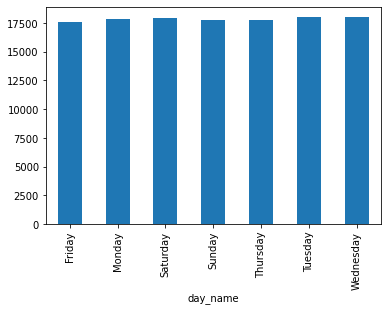

In [57]:
txn.groupby('day_name')['customer_id'].count().plot.bar()
plt.show()

3. Following the same logic as in section 1.2, generate the features that capture the count
of transactions per client, year and day of the week. The intermediate MultiIndex
dataframe (with nlevels=3) and the final pivoted output with a single index are shown
in the snapshots below.

In [58]:
annual_counts = txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count()
annual_counts = pd.DataFrame(annual_counts) 
annual_counts.columns = ['cnt']
annual_counts_pivot = annual_counts.pivot_table(index = 'customer_id',columns=['YEAR','day_name']).fillna(0).astype(int)
annual_counts_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [59]:
level_0 = annual_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_counts_pivot.columns.get_level_values(2).astype(str)

In [60]:
annual_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
annual_counts_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


4. Confirm that your output has the same number of rows as the final output in section 1.2
and save it as annual day of week counts pivot.xlsx. How many features/columns
did you create in this section?

In [61]:
annual_counts_pivot.shape[0]

6889

In [62]:
annual_counts_pivot.shape[0] == len(clnt_annual_aggregations_pivot)

True

In [63]:
annual_counts_pivot.shape[1]

35

In [64]:
annual_counts_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

5. Similarly, generate the features that capture the count of transactions per client,
month-end-date and day of the week. In contrast with the annual pivot table in
the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as
index to obtain the following output dataframe.

In [69]:
ME_counts = txn.groupby(["customer_id" ,"ME_DT","day_name"]).count()["tran_amount"]
ME_counts = pd.DataFrame(ME_counts) 
ME_counts.columns = ["cnt"]
ME_counts_pivot = ME_counts.pivot_table(index=['customer_id','ME_DT'],columns=["day_name"]).fillna(0).astype(int)

In [70]:
level_0 = ME_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = ME_counts_pivot.columns.get_level_values(1).astype(str)

In [71]:
ME_counts_pivot.columns = level_0 + '_' + level_1
ME_counts_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-02-28           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-02-28             0            0              0  

[103234 rows x 7 columns]

6. Join with base table pd as you did in section 1.5 and impute with your choice of
value for NaN. Save the final output as mth day counts.xlxs.

In [72]:
mth_day_counts = base_table_pd.join(ME_counts_pivot, on=['CLNT_NO','ME_DT'], how='left').fillna(0)
mth_day_counts.to_excel("mth_day_counts.xlsx")

1.7 Date-related features: days since last transaction

1. The starting point is again the txn table. Recall that most clients have a single
purchase per month, but some clients have multiple purchases in a month. Since
you want to calculate the ”days since last transaction”, you want to capture the last
transaction in a month for every client.
Use the appropriate groupby to create the table last monthly purchase that captures the last ’txn date’ (aggfunc=max) for every client and month.

In [73]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase = pd.NamedAgg('txn_date','max'))

2. Join base table pd with last monthly purchase as you did in section 1.5. The
snapshot below shows the output of the created object last monthly purchase base
for client CS1112 who made her/his first purchase on June 2011, then no purchase on
July and made a purchase again on August 2011. What values will you use to impute
the NaT values here? NaT stands for ”Not a Timestamp”.

In [74]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO', 'ME_DT'], how = 'left')
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], ascending = True, inplace = True)
client = last_monthly_purchase_base.loc[last_monthly_purchase_base.CLNT_NO == 'CS1112']
client

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT
157046,CS1112,2012-01-31,NaT
157032,CS1112,2012-02-29,NaT


In this case I may use last valid value to impute since for 0 is not okay for time so last valid value seems make more sense.

3. To answer the imputation problem, we have to think what value should we use for say
July 2011 for ’last monthly purchase’? The answer is that in July the value for the
last monthly purchase is the previous line value: 2011-06-15. In other words, for every
client we want to forward-fill the NaT values.
While pandas fillna() method has a method to forward-fill, here we want to use the
apply and a lambda function with the forward-fill function ffill(), with the following expression: .apply(lambda x: x.ffill()) applied on object last monthly -
purchase base grouped by CLNT NO. Below, I am showing a snapshot for lines
[92:98] that confirm the transition between clients CS1113 and CS1114.
You can also recreate the forward-fill with the fillna() method, however there is a
disadvantage and a reason the .apply() method is preferred here.

In [75]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


4. Subtract the two date columns and convert the output to .dt.days to calculate the
column ’days since last txn’ as shown in the following snapshot.

In [76]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


5. Plot a histogram of the ’days since last txn’. Based on the values you observe in the
histogram, impute the remaining NaN values (i.e. for the initial months before a client
makes a purchase). Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as
days since last txn.xlsx.

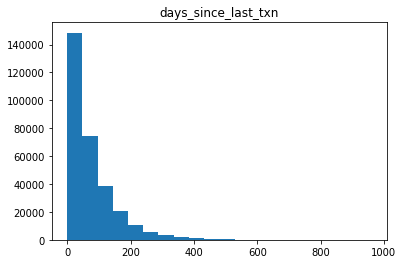

In [77]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 20)
plt.title("days_since_last_txn")
plt.show()

In [78]:
last_monthly_purchase_base.days_since_last_txn = last_monthly_purchase_base.days_since_last_txn.fillna(-1)
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,-1.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


In [79]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")